<a href="https://colab.research.google.com/github/SithmiDesilva/OralCancerEarlyDetection-DSGP/blob/Prediction-of-textual-data-II/Text_Data_Analysis_II_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Analysis**



1. **Import Libraries**

In [ ]:
#Import the dependencies
import numpy as np  #for computational calculations
import pandas as pd   # for manipulate dataframes
from sklearn.model_selection import train_test_split  # split the dataset into test train data
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,roc_auc_score,accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


In [ ]:
# Load the dataset
data=pd.read_csv("/content/drive/MyDrive/DSGP/DatasetNewII.csv")

2. **Load and Inspect the dataset**

In [ ]:
# First 5 rows of the dataset
print('\n First five rows:')
data.head()


 First five rows:


,public_id,lesion_id,patient_id,localization,larger_size,tobacco_use,alcohol_consumption,sun_exposure,gender,skin_color,age,cancer_or_non_cancer
0,0,50,48,Tongue,2.0,Yes,No,No,M,Black,76,Cancer
1,1,50,48,Tongue,2.0,Yes,No,No,M,Black,86,Cancer
2,2,41,39,Tongue,2.5,Yes,Former,Yes,M,White,36,Cancer
3,3,41,39,Tongue,2.5,Yes,Former,Yes,M,White,32,Cancer
4,4,87,81,Lip,1.5,Former,Yes,Yes,F,White,31,Cancer


In [ ]:
# Last 5 rows of the dataset
print('\n Last five rows:')
data.tail()


 Last five rows:


,public_id,lesion_id,patient_id,localization,larger_size,tobacco_use,alcohol_consumption,sun_exposure,gender,skin_color,age,cancer_or_non_cancer
2232,2232,92,65,Gingiva,1.8,Former,Former,Yes,F,Asian,51,Non-Cancer
2233,2233,71,31,Buccal mucosa,2.1,Yes,Yes,No,M,Hispanic,36,Cancer
2234,2234,48,87,Cheek,1.8,No,No,Yes,F,Brown,33,Cancer
2235,2235,51,73,Floor of mouth,2.3,No,No,No,M,Brown,81,Non-Cancer
2236,2236,88,92,Cheek,2.5,Yes,Former,No,F,Asian,82,Non-Cancer


In [ ]:
# Sanitory check
data.shape

(2237, 12)

In [ ]:
# More details about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   public_id             2237 non-null   int64  
 1   lesion_id             2237 non-null   int64  
 2   patient_id            2237 non-null   int64  
 3   localization          2237 non-null   object 
 4   larger_size           2237 non-null   float64
 5   tobacco_use           2237 non-null   object 
 6   alcohol_consumption   2237 non-null   object 
 7   sun_exposure          2237 non-null   object 
 8   gender                2237 non-null   object 
 9   skin_color            2237 non-null   object 
 10  age                   2237 non-null   int64  
 11  cancer_or_non_cancer  2237 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 209.8+ KB


In [ ]:
#Statistical Description
data.describe()

,public_id,lesion_id,patient_id,larger_size,age
count,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000
mean,1118.000000,62.080912,55.187751,2.176933,54.300402
std,645.910598,26.806605,25.483878,0.959472,21.130040
min,0.000000,0.000000,0.000000,0.000000,18.000000
25%,559.000000,43.000000,36.000000,1.500000,36.000000
50%,1118.000000,62.000000,52.000000,2.100000,54.000000
75%,1677.000000,82.000000,74.000000,2.700000,72.000000
max,2236.000000,216.000000,183.000000,6.000000,90.000000


3. **Understand the Numerical Features**

In [ ]:
# Select numeric variables
numerical_columns = data.select_dtypes(include=['int64', 'float64'])

# Print numeric variables
print("Numeric Variables:")
print(numerical_columns.head())

Numeric Variables:
   public_id  lesion_id  patient_id  larger_size  age
0          0         50          48          2.0   76
1          1         50          48          2.0   86
2          2         41          39          2.5   36
3          3         41          39          2.5   32
4          4         87          81          1.5   31


4. **Histograms for Numerical Features**

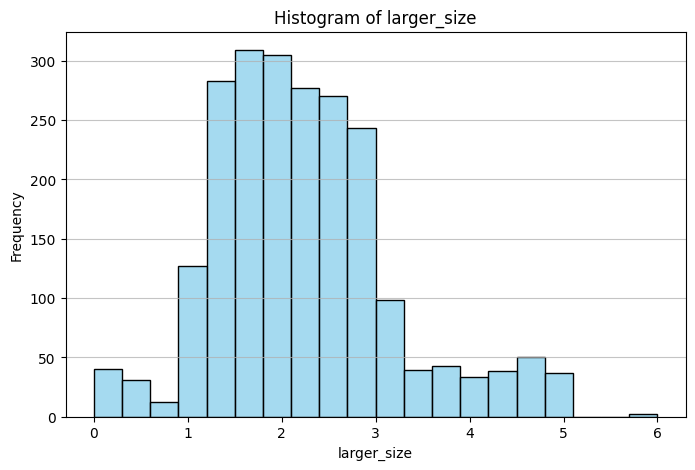

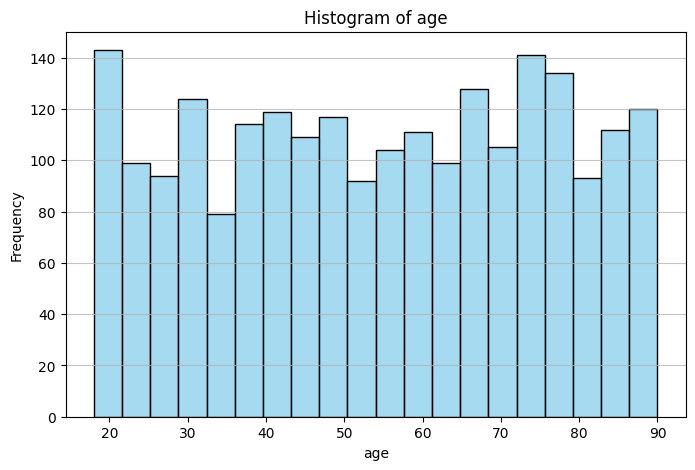

In [ ]:
# Plot histograms for specific numerical variables
for column in ['larger_size', 'age','tobacco_use','alcohol_consumption','sun_exposure','gender']:
    if column in data.select_dtypes(include=['number']).columns:
        plt.figure(figsize=(8, 5))
        sns.histplot(data, x=column, bins=20, color='skyblue', edgecolor='black')
        plt.title(f"Histogram of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.grid(axis='y', alpha=0.75)
        plt.show()


5. **Boxplots to identify outliers in Numerical Features**

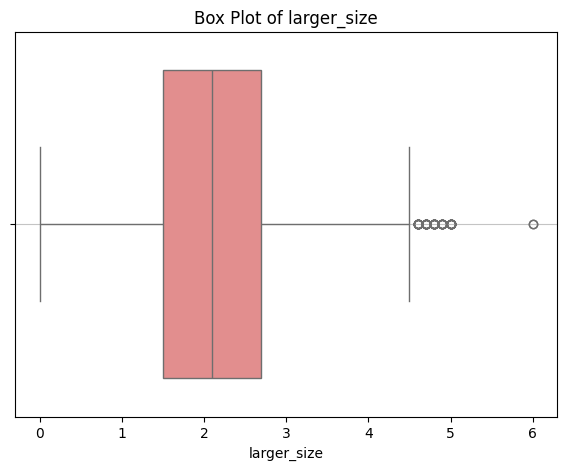

In [ ]:
# Plot box plots for specific numerical variables to identify outliers
for column in ['larger_size', 'age_group']:
    if column in data.select_dtypes(include=['number']).columns:
        plt.figure(figsize=(7, 5))
        sns.boxplot(data=data, x=column, color='lightcoral')
        plt.title(f"Box Plot of {column}")
        plt.xlabel(column)
        plt.grid(axis='y', alpha=0.75)
        plt.show()

6. **Handle Outliers using IQR method**

In [ ]:
# Calculate the IQR for the 'larger_size' column
Q1 = data['larger_size'].quantile(0.25)  # 25th percentile
Q3 = data['larger_size'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to exclude outliers
filtered_data = data[(data['larger_size'] >= lower_bound) & (data['larger_size'] <= upper_bound)]

# Display the number of rows removed
removed_rows = len(data) - len(filtered_data)
print(f"Number of rows removed: {removed_rows}")

Number of rows removed: 67


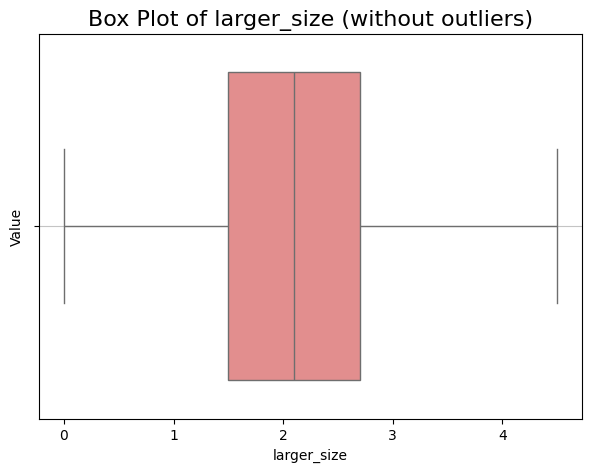

In [ ]:
# Plot box plots for specific numerical variables without outliers and in larger size
for column in ['larger_size']:
    if column in data.select_dtypes(include=['number']).columns:
        plt.figure(figsize=(7, 5))  # Increased figure size
        sns.boxplot(data=data, x=column, showfliers=False, color='lightcoral') # showfliers=False removes outliers
        plt.title(f"Box Plot of {column} (without outliers)", fontsize=16) # Increased title font size
        plt.xlabel(column) # Increased x-axis label font size
        plt.ylabel("Value") #Added y-axis label
        plt.grid(axis='y', alpha=0.75)

        plt.show()


7. **Understand Categorical Features**

In [ ]:
# Select categorical variables
categorical_columns = data.select_dtypes(include=['object'])

# Print categorical variables
print("Categorical Variables:")
print(categorical_columns.head())

Categorical Variables:
  localization tobacco_use alcohol_consumption sun_exposure gender skin_color  \
0       Tongue         Yes                  No           No      M      Black   
1       Tongue         Yes                  No           No      M      Black   
2       Tongue         Yes              Former          Yes      M      White   
3       Tongue         Yes              Former          Yes      M      White   
4          Lip      Former                 Yes          Yes      F      White   

  cancer_or_non_cancer  
0               Cancer  
1               Cancer  
2               Cancer  
3               Cancer  
4               Cancer  


8. **Explore Unique Values**

In [ ]:
# Print unique values for each column
print("Unique Values in Each Column:")
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print("----")

Unique Values in Each Column:
Column: public_id
Unique Values: [   0    1    2 ... 2234 2235 2236]
----
Column: lesion_id
Unique Values: [ 50  41  87 103 101  54 129  11  22  68  58  77 102  33  96  84 106  53
  88 130  15  64 104  24  73  31  30  42   6  27  78  18  83  74  95  62
  56  59   1  47  45  85  67  23 107  80  94  90   0  32  51  12  36  86
  72  89  26  91  57  38  70  75 131  52  20  98  37 123 124 190 191 192
 193 194 195 215 216  93  49  55  40  65  66  97  44  76  34  43  99  81
  61  79  60  39  35  69  48  82  63  46  71  92   5  16  29  14  25   8
  13   2  28   7  19   4  10 100   3   9  17  21]
----
Column: patient_id
Unique Values: [ 48  39  81  78  14  52  24  10  20  63  55  71  31  90  51  82  13  60
  22  67  28  27  40   6  25  72  16  77  68  89  58  53  56   1  45  43
  79  62  21  29  74  88  84   0  30  49  11  34  80  66  83  85  54  36
  65  69  12  50  18  92  35 108 160 161 162 163 164 165 183  38  37  47
  32  46  59  57  26  44  41  42  23  33  70

# **Data Cleaning**


9. **Handle Missing Values**

In [ ]:
# Handle missing values
data.isnull().sum()

,0
public_id,0
lesion_id,0
patient_id,0
localization,0
larger_size,0
tobacco_use,0
alcohol_consumption,0
sun_exposure,0
gender,0
skin_color,0


10. **Handle Duplicate Values**

In [ ]:
# Check for duplicate rows
print(f"\nNumber of duplicate rows before removal: {data.duplicated().sum()}")



Number of duplicate rows before removal: 0


# **Feature Engineering**

11. **Label Encoding**

In [ ]:
# Encode categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    if column != 'cancer_or_non_cancer':
        print(f"Column: {column}")
        print(f"Unique values before encoding: {data[column].unique()}")

        # Apply LabelEncoder
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])

        print(f"Unique values after encoding: {data[column].unique()}")
        print("-")

Column: localization
Unique values before encoding: ['Tongue' 'Lip' 'Floor of mouth' 'Buccal mucosa' 'Palate' 'Gingiva'
 'Cheek' 'Gum' 'Buccal Mucosa']
Unique values after encoding: [8 6 3 1 7 4 2 5 0]
-
Column: tobacco_use
Unique values before encoding: ['Yes' 'Former' 'No' 'Not informed']
Unique values after encoding: [3 0 1 2]
-
Column: alcohol_consumption
Unique values before encoding: ['No' 'Former' 'Yes' 'Not informed']
Unique values after encoding: [1 0 3 2]
-
Column: sun_exposure
Unique values before encoding: ['No' 'Yes' 'Not informed']
Unique values after encoding: [0 2 1]
-
Column: gender
Unique values before encoding: ['M' 'F']
Unique values after encoding: [1 0]
-
Column: skin_color
Unique values before encoding: ['Black' 'White' 'Not informed' 'Brown' 'Asian' 'Hispanic']
Unique values after encoding: [1 5 4 2 0 3]
-


12. **Map Target Variable**

In [ ]:
# Map target variable to binary
data['cancer_or_non_cancer'] = data['cancer_or_non_cancer'].map({'Cancer': 1, 'Non-Cancer': 0})

13. **Check for Data Imbalance**

In [ ]:
#Analyze Target Imbalance
target_column = 'cancer_or_non_cancer'
print("\nTarget value distribution:")
print(data[target_column].value_counts())



Target value distribution:
cancer_or_non_cancer
0    1633
1     604
Name: count, dtype: int64


<Axes: xlabel='cancer_or_non_cancer'>

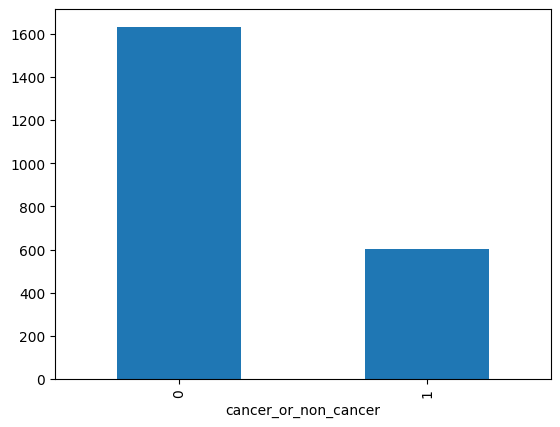

In [ ]:
data[target_column].value_counts().plot(kind='bar')

14. **Handle data Imbalance Using SMOTE**

In [ ]:
# Handle class imbalance using SMOTE
X = data.drop(columns=[target_column])
y = data[target_column]

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("\nClass distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())


Class distribution after SMOTE:
cancer_or_non_cancer
1    1633
0    1633
Name: count, dtype: int64


<Axes: xlabel='cancer_or_non_cancer'>

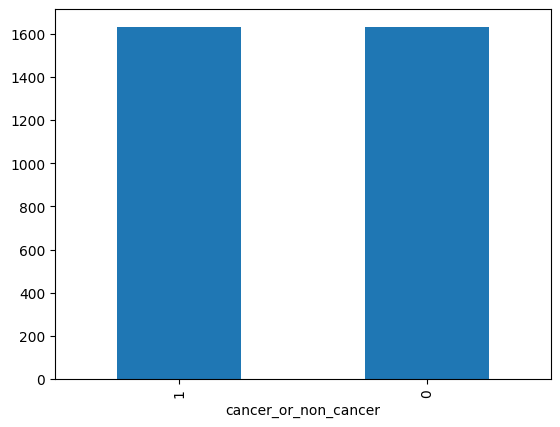

In [ ]:
 pd.Series(y_resampled).value_counts().plot(kind='bar')

15. **Correlation Analysis**

In [ ]:
#Correlation Analysis
print("\nCorrelation Analysis:")
correlation_matrix = data.corr()
correlation_with_target = correlation_matrix['cancer_or_non_cancer'].sort_values(ascending=False)
print(correlation_with_target)


Correlation Analysis:
cancer_or_non_cancer    1.000000
localization            0.068836
skin_color              0.017312
gender                  0.014332
sun_exposure            0.009561
alcohol_consumption     0.008785
age                     0.008654
tobacco_use            -0.005747
larger_size            -0.010883
lesion_id              -0.016488
patient_id             -0.043370
public_id              -0.174845
Name: cancer_or_non_cancer, dtype: float64


16. **Visualize Correlation Map**

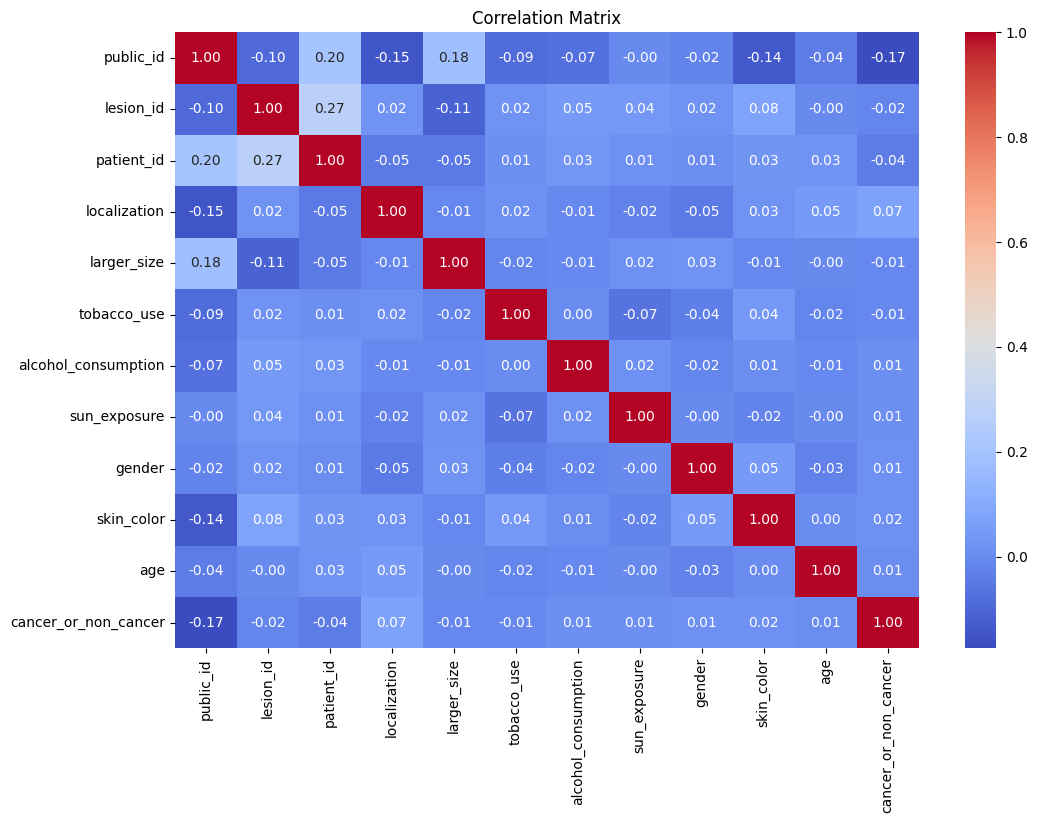

In [ ]:
# Visualize correlation with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# **Feature Selection**

In [ ]:
# Remove unnecessary features based on correlation and domain knowledge
columns_to_drop = ['patient_id', 'public_id', 'lesion_id']  # Irrelevant for prediction
print(f"\nDropping columns: {columns_to_drop}")
data = data.drop(columns=columns_to_drop)


Dropping columns: ['patient_id', 'public_id', 'lesion_id']


In [ ]:
# Print remaining features
print("\nRemaining features after dropping unnecessary columns:")
print(list(data.columns))


Remaining features after dropping unnecessary columns:
['localization', 'larger_size', 'tobacco_use', 'alcohol_consumption', 'sun_exposure', 'gender', 'skin_color', 'age', 'cancer_or_non_cancer']


17. **Split the Dataset**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 2286
Test set size: 980


In [ ]:
# Save feature names before scaling (to maintain correct order)
feature_names = X_train.columns.tolist()
print(feature_names)
with open('feature_names.pkl', 'wb') as file:
    pickle.dump(feature_names, file)

['public_id', 'lesion_id', 'patient_id', 'localization', 'larger_size', 'tobacco_use', 'alcohol_consumption', 'sun_exposure', 'gender', 'skin_color', 'age']


18. **Feature Scaling**

In [ ]:
# Standard scaling
scaler = StandardScaler()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Save the scaler to use during predictions
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("Data preprocessing completed.")

Data preprocessing completed.


# **Model Training**

1. **Logistic Regression Model**

In [ ]:
#Load saved feature names
with open('feature_names.pkl', 'rb') as file:
    feature_names = pickle.load(file)


model=LogisticRegression()

In [ ]:
from sklearn.pipeline import make_pipeline, Pipeline # Import Pipeline
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data
Pipeline(steps=[('standardscaler', StandardScaler()), # Pipeline is now defined
                ('logisticregression', LogisticRegression())])

pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

0.5969387755102041

In [ ]:
##Training the logisticRegression model using training data
model.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#cross validation for training data
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,X_train,y_train,cv=10)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
#Accuracy on the training data
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,y_train)

In [ ]:
print("Accuracy on training data:",training_data_accuracy)


Accuracy on training data: 0.6115485564304461


In [ ]:
#Classification report
print(classification_report(y_train,X_train_prediction))
print('\nROC_AUC_Curve:',roc_auc_score(y_train,X_train_prediction))

              precision    recall  f1-score   support

           0       0.60      0.67      0.64      1156
           1       0.62      0.55      0.58      1130

    accuracy                           0.61      2286
   macro avg       0.61      0.61      0.61      2286
weighted avg       0.61      0.61      0.61      2286


ROC_AUC_Curve: 0.6108912331200049


In [ ]:
#Accuracy on test data
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,y_test)

In [ ]:
print('Accuracy on testing data:',test_data_accuracy)

Accuracy on testing data: 0.5969387755102041


In [ ]:
#Clarification report
print(classification_report(y_test,X_test_prediction))
print('\nROC_AUC_Curve:',roc_auc_score(y_test,X_test_prediction))

              precision    recall  f1-score   support

           0       0.58      0.62      0.60       477
           1       0.61      0.58      0.59       503

    accuracy                           0.60       980
   macro avg       0.60      0.60      0.60       980
weighted avg       0.60      0.60      0.60       980


ROC_AUC_Curve: 0.5974946963918794


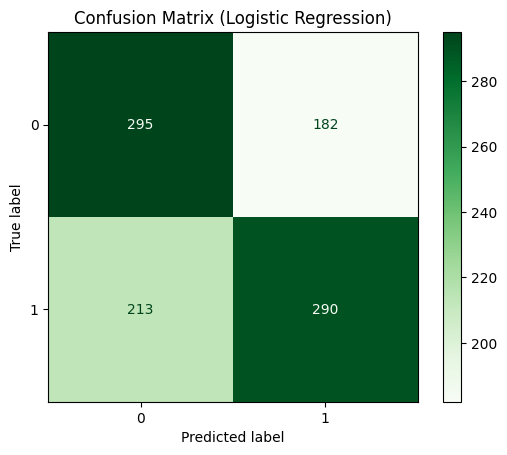

In [ ]:
# --- Logistic Regression Confusion Matrix ---

lr_confusion_matrix = metrics.confusion_matrix(y_test, X_test_prediction)


# Create ConfusionMatrixDisplay
lr_cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=lr_confusion_matrix, display_labels=[0, 1]
)

# Plot
lr_cm_display.plot(cmap='Greens')  # Customize color if needed
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()

In [ ]:
# Save the trained logistic regression model
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)  # Change 'logistic_regression_model' to 'model'

print("\n Logistic Regression model saved as 'logistic_regression_model.pkl'.")


 Logistic Regression model saved as 'logistic_regression_model.pkl'.


2. **Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Load saved feature names
with open('feature_names.pkl', 'rb') as file:
    feature_names = pickle.load(file)

#Building the model
randomforest_classifier=RandomForestClassifier(n_estimators=100)
score=cross_val_score(randomforest_classifier,X_resampled,y_resampled,cv=10)




In [ ]:
print(score)

[0.40366972 0.18654434 0.15902141 0.31192661 0.49847095 0.49541284
 0.55521472 0.7607362  0.88343558 0.49386503]


In [ ]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100,150,200], 'max_depth':[10,20,30,40]
}

grid_search = GridSearchCV(estimator=randomforest_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_resampled, y_resampled)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'n_estimators': [50, 100, 150, 200]})

In [ ]:
#Accuracy of the training data
randomforest_classifier.fit(X_resampled,y_resampled)
X_train_prediction_1=randomforest_classifier.predict(X_train)
print('Accuracy of Training data:',accuracy_score(X_train_prediction_1,y_train))
print('\nClassification Report\n',classification_report(y_train,X_train_prediction_1))
print('\nROC_AUC_Curve:',roc_auc_score(y_train,X_train_prediction_1))


Accuracy of Training data: 1.0

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1156
           1       1.00      1.00      1.00      1130

    accuracy                           1.00      2286
   macro avg       1.00      1.00      1.00      2286
weighted avg       1.00      1.00      1.00      2286


ROC_AUC_Curve: 1.0


In [ ]:
#Accuracy of the testing data
X_test_prediction_1=randomforest_classifier.predict(X_test)
print('Accuracy of the Testing data:',accuracy_score(X_test_prediction_1,y_test))
print('\nClassification Report\n',classification_report(y_test,X_test_prediction_1))
print('\nROC_AUC_Curve:',roc_auc_score(y_test,X_test_prediction_1))


Accuracy of the Testing data: 1.0

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       477
           1       1.00      1.00      1.00       503

    accuracy                           1.00       980
   macro avg       1.00      1.00      1.00       980
weighted avg       1.00      1.00      1.00       980


ROC_AUC_Curve: 1.0


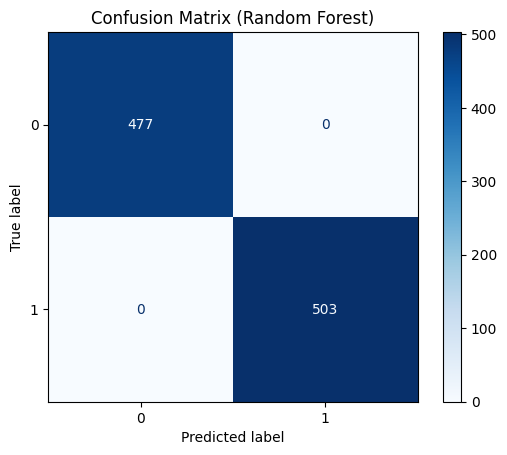

In [ ]:

# --- Random Forest Confusion Matrix ---

rf_confusion_matrix = metrics.confusion_matrix(y_test, X_test_prediction_1)

# Create ConfusionMatrixDisplay
rf_cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=rf_confusion_matrix, display_labels=[0, 1]
)

# Plot
rf_cm_display.plot(cmap='Blues')
plt.title("Confusion Matrix (Random Forest)")
plt.show()

In [ ]:
# Save the trained random forest model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(randomforest_classifier, file)  # Change 'rf_model' to 'randomforest_classifier'

print("\n Random Forest model saved as 'random_forest_model.pkl'.")


 Random Forest model saved as 'random_forest_model.pkl'.


3. **Light GBM Model**

In [ ]:

# Load saved feature names
with open('feature_names.pkl', 'rb') as file:
    feature_names = pickle.load(file)

# Initialize LightGBM model
lgb_model = LGBMClassifier(random_state=42)

# Train the model
lgb_model.fit(X_train_scaled, y_train)

# Evaluate on Test Data
y_pred_lgb = lgb_model.predict(X_test_scaled)
y_prob_lgb = lgb_model.predict_proba(X_test_scaled)[:, 1]

print("\nAccuracy of Testing data:",accuracy_score(y_test,y_pred_lgb))
print("\nLightGBM Classification Report on Test Data:")
print(classification_report(y_test, y_pred_lgb))
print(f"LightGBM ROC-AUC Score on Test Data: {roc_auc_score(y_test, y_prob_lgb):.2f}")

# Evaluate on Training Data
y_train_pred_lgb = lgb_model.predict(X_train_scaled)
y_train_prob_lgb = lgb_model.predict_proba(X_train_scaled)[:, 1]

print("\nAccuracy of Training data:",accuracy_score(y_train,y_train_pred_lgb))
print("\nLightGBM Classification Report on Training Data:")
print(classification_report(y_train, y_train_pred_lgb))
print(f"LightGBM ROC-AUC Score on Training Data: {roc_auc_score(y_train, y_train_prob_lgb):.2f}")

# Save the trained random forest model
with open('lightGBM_model.pkl', 'wb') as file:
    pickle.dump(lgb_model, file)  # Change 'rf_model' to 'randomforest_classifier'

print("\n LightGBM model saved as 'lightGBM_model.pkl'.")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1130, number of negative: 1156
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001688 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 824
[LightGBM] [Info] Number of data points in the train set: 2286, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494313 -> initscore=-0.022748
[LightGBM] [Info] Start training from score -0.022748

Accuracy of Testing data: 0.7765306122448979

LightGBM Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       477
           1       0.78      0.78      0.78       503

    accuracy                           0.78       980
   macro avg       0.78      0.78      0.78       980
weighted avg       0.78      0.78      0.78       980

LightGBM ROC-AUC Score on T

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


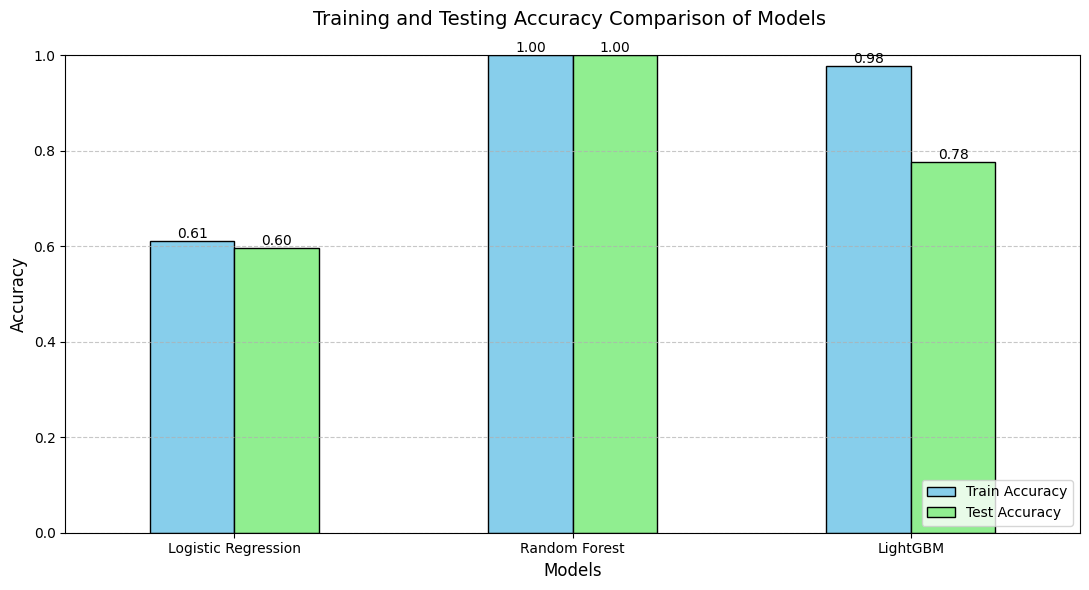


Model Comparison Results:
                 Model  Train Accuracy  Test Accuracy
0  Logistic Regression        0.611549       0.596939
1        Random Forest        1.000000       1.000000
2             LightGBM        0.977253       0.776531


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Load saved feature names
with open('feature_names.pkl', 'rb') as file:
    feature_names = pickle.load(file)

# Load the scaler (read mode)
with open('scaler.pkl', 'rb') as file:  # Change 'wb' to 'rb' for reading
    scaler = pickle.load(file)

# Load the logistic regression model (read mode)
with open('logistic_regression_model.pkl', 'rb') as file:  # Change 'wb' to 'rb' for reading
    model = pickle.load(file)

# Load the random forest model (read mode)
with open('random_forest_model.pkl', 'rb') as file:  # Change 'wb' to 'rb' for reading
    randomforest_classifier = pickle.load(file)

# Load the LightGBM model (read mode)
with open('lightGBM_model.pkl', 'rb') as file:  # Change 'wb' to 'rb' for reading
    lgb_model = pickle.load(file)

# Create a dictionary to store the results
results = {
    'Model': ['Logistic Regression', 'Random Forest', 'LightGBM'],
    'Train Accuracy': [
        accuracy_score(y_train, model.predict(X_train)),  # Logistic Regression
        accuracy_score(y_train, randomforest_classifier.predict(X_train)),  # Random Forest
        accuracy_score(y_train, lgb_model.predict(X_train_scaled))  # LightGBM
    ],
    'Test Accuracy': [
        accuracy_score(y_test, model.predict(X_test)),  # Logistic Regression
        accuracy_score(y_test, randomforest_classifier.predict(X_test)),  # Random Forest
        accuracy_score(y_test, lgb_model.predict(X_test_scaled))  # LightGBM
    ]
}

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Plot the comparison
ax = results_df.set_index('Model')[['Train Accuracy', 'Test Accuracy']].plot(
    kind='bar',
    figsize=(11, 6),
    color=['skyblue', 'lightgreen'],
    edgecolor='black'
)

# Add text annotations for better readability
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10)

# Set plot title and labels
plt.title('Training and Testing Accuracy Comparison of Models \n', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1 for accuracy
plt.legend(loc='lower right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Print the results DataFrame
print("\nModel Comparison Results:")
print(results_df)


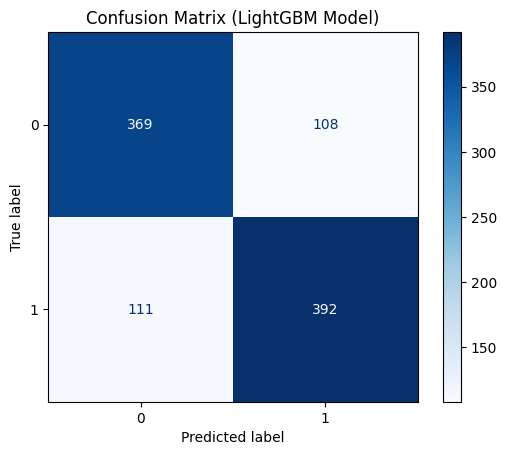

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix  # Import confusion_matrix
import seaborn as sns
from sklearn import metrics  # Import the metrics module
import matplotlib.pyplot as plt  # Import matplotlib.pyplot for plotting

# Calculate the confusion matrix using LightGBM predictions (y_pred_lgb)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lgb)

# Create a ConfusionMatrixDisplay object for visualization
cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix,
    display_labels=[0, 1]  # Assuming binary classification (0 and 1)
)

# Plot the confusion matrix
cm_display.plot(cmap='Blues')
plt.title("Confusion Matrix (LightGBM Model)")  # Add a title
plt.show()

In [ ]:

# Load trained models
with open('logistic_regression_model.pkl', 'rb') as file:
    logistic_regression_model = pickle.load(file)
with open('random_forest_model.pkl', 'rb') as file:
    rf_model = pickle.load(file)

with open('lightGBM_model.pkl', 'rb') as file:
    lgb_model = pickle.load(file)



# Load the scaler and feature names from training
with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

with open('feature_names.pkl', 'rb') as file:
    feature_names = pickle.load(file)  # Ensures correct feature order

# Define categorical and numerical features
categorical_features = ['localization', 'tobacco_use', 'alcohol_consumption', 'sun_exposure', 'gender', 'skin_color']
numerical_features = ['larger_size', 'age_group']

# Define LabelEncoders (Use mappings from training)
label_encoders = {
    'localization': LabelEncoder().fit(['Tongue', 'Lip', 'Floor of mouth', 'Buccal mucosa', 'Palate', 'Gingiva', 'Cheek', 'Gum', 'Buccal Mucosa']),
    'tobacco_use': LabelEncoder().fit(['Yes', 'Former', 'No', 'Not informed']),
    'alcohol_consumption': LabelEncoder().fit(['No', 'Former', 'Yes', 'Not informed']),
    'sun_exposure': LabelEncoder().fit(['No', 'Yes', 'Not informed']),
    'gender': LabelEncoder().fit(['M', 'F']),
    'skin_color': LabelEncoder().fit(['Black', 'White', 'Not informed', 'Brown', 'Asian', 'Hispanic']),
}

# Function to categorize age into groups
def categorize_age(age):
    """Categorize age into risk groups."""
    try:
        age = int(age)
        return 0 if age < 40 else 1 if 40 <= age <= 60 else 2
    except ValueError:
        print("⚠️ Invalid input for age. Defaulting to group 1 (40-60 years).")
        return 1  # Default to medium age risk

# Function to get user input
def get_user_input():
    """Take user input for all required features and return a dictionary."""
    user_data = {}

    print("\n🔹 Enter values for the following features:")
    for feature in categorical_features + ['larger_size', 'age']:
        user_data[feature] = input(f"   {feature}: ").strip()

    return user_data

# Take user input
user_data = get_user_input()

# Convert age input to numeric and categorize it
user_data['age_group'] = categorize_age(user_data['age'])

# Convert input data into a DataFrame
input_df = pd.DataFrame([user_data])

# Apply Label Encoding to categorical features (ensuring consistency with training)
for feature in categorical_features:
    if user_data[feature] in label_encoders[feature].classes_:
        input_df[feature] = label_encoders[feature].transform([user_data[feature]])
    else:
        default_value = 'Not informed' if 'Not informed' in label_encoders[feature].classes_ else label_encoders[feature].classes_[0]
        print(f"⚠️ Warning: Unseen category '{user_data[feature]}' for {feature}. Using '{default_value}' as default.")
        input_df[feature] = label_encoders[feature].transform([default_value])

# Ensure numerical columns are correctly formatted
input_df[['larger_size', 'age_group']] = input_df[['larger_size', 'age_group']].astype(float)

# Ensure features are in the same order as training
input_df = input_df.reindex(columns=feature_names, fill_value=0)

# Standard Scaling (Use same scaler from training)
input_scaled = scaler.transform(input_df)

# Make predictions using all five models
lr_prob=model.predict_proba(input_scaled)[:, 1][0]
rf_prob = rf_model.predict_proba(input_scaled)[:, 1][0]  # Extract probability for the positive class
lgb_prob = lgb_model.predict_proba(input_scaled)[:, 1][0]  # LightGBM probability

# Ensure probabilities are within bounds (0-1)
lr_prob = max(0, min(1, lr_prob))
rf_prob = max(0, min(1, rf_prob))
lgb_prob = max(0, min(1, lgb_prob))

# Final Probability Calculation (Averaging Model Outputs)
final_probability = ( rf_prob + lgb_prob+ lr_prob) / 3

# Display results
print("\n🔹 Model Predictions for Oral Cancer Risk:")
print(f"   📊 Logistic Regression Probability: {lr_prob:.4f}")
print(f"   🌳 Random Forest Probability: {rf_prob:.4f}")
print(f"   🔆 LightGBM Probability: {lgb_prob:.4f}")
print(f"   🎯 **Final Risk Probability: {final_probability:.4f}** (Scale: 0 to 1)")

# Interpretation based on probability thresholds
threshold_high = 0.5
threshold_medium = 0.3

if final_probability >= threshold_high:
    print("   🛑 **High Risk of Cancer Detected**")
elif threshold_medium<=final_probability <= threshold_high:
    print("   ⚠️ **Medium Risk of Cancer Detected**")
else:
    print("   ✅ **Low Risk - No Cancer Detected**")

# Determine best two models based on performance
model_scores = {
    'Logistic Regression': lr_prob,
    'Random Forest': rf_prob,
    'LightGBM': lgb_prob
}



🔹 Enter values for the following features:
